# Understanding the Data

# World Development Indicators Exploratory Data Analysis (EDA)

The World Development Indicator (WDI) data set has yet to be explored.  It is full of promise and curiosity to understand how the world data indicators are related in any way form or fashion.  From a data scientist point of view,  there is only one way to understand the data set.  This is, the data set is a gift that will remain a mystery until we unwrap it and do a thorough exploratory data analysis.


The WDI data set does **NOT** have the luxury of putting all of the data into one csv data file.   The WDI data set is composed of the following separate data sets:


* Country.csv
* CountryNotes.csv
* database.sqlite
* Footnotes.csv
* Indicators.csv
* Series.csv
* SeriesNotes.csv

Our goal is to create a global data frame which ties all of above data sets into one using Python's pandas libraries or SFrames.   This will later enable our team to easily explore and visualize the data set using simple Python programming techniques. 

Data is expensive and none of the initial data collected will be discarded.  Our team took the approach to analyze each data set and understand how the above data set's are related.  

The World Bank has set two ambitious goals to push extreme poverty to no more 3 percent by 2030, and to promote shared prosperity and greater equity in the developing world.  The World Bank's mission is to fight poverty in developing countries. This second goal reflects the fact that all countries aspire to a better living standard for all of their citizens, not only for the already-privileged (Reference http://www.worldbank.org)


In [1]:
# This code imports the packages we will be using, and sets parameters for the matplotlib.pylab package.

import graphlab
import graphlab as gl
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statistics as statistics
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# Data Visualization
# graphlab visualization setup
graphlab.canvas.set_target("ipynb")
%matplotlib inline

In [2]:
# Path to where all of the data set files resides 
path = 'data'

# Describe the purpose of the data set you selected:  
The World Development Indicators, or WDI dataset is collected by the World Bank, an organization who lists its two goals as ending extreme poverty and boosting shared prosperity.  This data was collected to help promote those two goals by recording and analyzing a large number of indicators that can help identify which countries are in the greatest need, and how that need has changed over time.  For our purposes, we will be exploring this dataset to identify differences between three of the largest and most powerful nations in the world, the US, China, and Russia.  
  
We will measure and define the outcomes from this dataset as values recorded or predicted for a particular country that correspond to key indicators of its economic, health, and social wellbeing.  This data is important, particularly in the way we are analyzing it, because it can reveal key relationships and differences between these three powerful countries and help predict how those relationships may shift over time.  We will know we have mined useful information from the dataset when we are able to clearly define the current state, trend, and relationship for each country's general health in our key areas of interest.  We will also know we have mined useful information when we can make accurate classifications or predictions that can determine what other groups of countries are most similar or dissimilar to one or more of the US, China, or Russia.  
  
We will measure the effectiveness of a good prediction algorithm on this data by how high the correlation coeffecient R is for any linear regression prediction.  We will measure the effectiveness of a good clustering classification algorithm on this data by the euclidean distance between any given point in a cluster to that cluster's centroid compared to its distance to other cluster's centroids.  The closer the point is to the classified cluster's centroid and the farther away it is from other cluster centroids the better we will judge that classification to be.

# Data Understanding - Describe the meaning and type of data for each attribute in the data file

This data is spread across multiple discrete datasets.  The one dataset that is most useful for analysis is the Indicators.csv dataset as it includes values for all of the attributes, or indicators, that the WDI gathers.  All other datasets include metadata and descriptive Nominal attributes.  One such example of this is the Country.csv dataset.  This dataset includes 31 attributes.  These features include 6 that uniquely identify each country, while the rest of the features describe various financial, agricultural, health, and government metadata for each country in the dataset.  A brief description of these attributes are included below:  

## Country.csv Dataset
### ATTRIBUTE NAME - TYPE - MEANING
CountryCode - Nominal - A unique three letter code representing each country.  
ShortName - Nominal - A brief version of the country name.  
TableName - Nominal - Each countries name in a format appropriate for displaying in tables.  
LongName - Nominal - The full version of the name for each country.  
Alpha2Code - Nominal - A unique two letter code representing each country.  
CurrencyUnit - Nominal - The full name of the unit of currency used in each country.  
SpecialNotes - Nominal - Any miscellaneous notes that the researchers wanted to add to the country record, such as unusual fiscal year schedules that could impact one or more other attributes.  
Region - Nominal - The major geographical region that each country belongs to.  
IncomeGroup - Ordinal - A description of the income group for each country relative to others in the dataset.  
Wb2Code - Nominal - Another unique two letter code representing each country, similar to the Alpha2Code feature.  
NationalAccountsBaseYear - Integer - The base year used for calculating an index for the country's financial health.  
NationalAccountsReferenceYear - Integer - A reference year used for calculating an index for the country's financial health if for some reason they do not have or do not use a base year.  
SnaPriceValuation - Binary - A descriptive indicator of whether the country accounts for its financials by calculating Value Added at Basic Prices (VAB) or Value Added at Producer Prices (VAP).  
LendingCategory - Nominal - The category that each country has been classified as for the purposes of lending from the world bank.  These classifications are typically IDA, IBRD, or "Blend" for those countries both poor enough to borrow from the IDA but also creditworthy enough to borrow from the IBRD.  
OtherGroups - Nominal - A miscellaneous listing of any other major groups of nations that the country may fall under, such as "HIPC" for the Heavily Indebted Poor Countries.  
SystemOfNationalAccounts - Nominal - The system used by the country to manage national accounts.  
AlternativeConversionFactor - Integer - A conversion rate used by the World Bank when actual conversion rates are deemed inaccurate or inadequate for the needs of the data.   
PppSurveyYear - Integer - The most recent year in which Purchasing Power Parity, or PPP, was surveyed within the country.   
BalanceOfPaymentsManualInUse - Nominal - A brief description of the manual used by each country to manage its balance of payments.   
ExternalDebtReportingStatus - Nominal - How the country reports external debt, such as "actual" if they report the actual value of the external debt.    
SystemOfTrade - Binary - An indicator of whether each country uses a general system of trade or a special system of trade.  
GovernmentAccountingConcept - Nominal - A description of how each country handles their national finances, such as centralized budget versus non-centralized, etc.  
ImfDataDisseminationStandard - Nominal - Which global data dissemination standard the country adheres to, if any.  
LatestPopulationCensus - Integer - The year in which the most recent census of each country's population was administered.  
LatestHouseholdSurvey - Integer/Nominal - The year in which the most recent household survey was administered to the populace of each country, as well as a description of the type of survey performed.  
SourceOfMostRecentIncomeAndExpenditureData - Nominal/Integer - What survey produced the most recent income and expenditure data for each country, as well as the year in which that survey was administered.  
VitalRegistrationComplete - Binary - A Yes/No record of whether each country completed vital registration.  
LatestAgriculturalCensus - Integer - The year in which the most recent agricultural census was administered for each country.  
LatestIndustrialData - Integer - The year in which the most recent industrial data was gathered for each country.  
LatestTradeData - Integer - The year in which the latest trade data was gathered for each country.  
LatestWaterWithdrawalData - Integer - The year in which the latest water withdrawal data was gathered for each country.  
  
  
While this is helpful, the majority of our analysis will be performed on the Indicators.csv file, which includes the values of interest that are predominantly continuous or integer values.  One point of interest in this dataset is that each indicator is not given its own column in the data, rather there is one "IndicatorName" column that identifies the Indicator and the actual value for that Indicator, or Attribute, is given in a Value column.  This presented an interesting twist on the standard dataset layout which is accounted for in our code through the rest of this project.  I will detail the name, type, and meaning for the 6 Attributes or columns that are included in the indicators.csv dataset as it is currently constructed:  
  
## Indicators.csv Dataset  
### ATTRIBUTE NAME - TYPE - MEANING  
CountryName - Nominal - The full name for each country in the dataset.  
CountryCode - Nominal - A three letter code that uniquely identifies each country in the dataset.  
IndicatorName - Nominal - Includes the name and a brief description of the Indicator that this row's value relates to.
IndicatorCode - Nominal - A three letter coded that unique identifies each Indicator in the dataset.
Year - Integer - The year for which the Value was collected for the given Indicator.
Value - Varies, but usually Coninuous - The Value colleected in the given Year for the given Indicator.  
  
While there are far too many indicators to be able to exhaustively list them here, the five indicators that are of particular interest that we will be exploring are as follows:
  
1. Adolescent Birth Rate - Continuous -  This is the number of births per thousand population where the mother is between age 15 and 19.  
2. GDP - Continuous -  This is the total Gross Domestic Product given in current US Dollars.  
3. GDP Per Capita - Continuous - This is the total GDP divided by the population of the country.  
4. The number of women that participate in government - Proportion - This is the percentage of total parliamentary or legislative seats held by women.  
5. The Labor Force Participation Rate - Proportion - This is a measurement of what percent of the population that are of the age to participate in the labor force actually do.  
  


# Brief Descriptions of each CSV file  
Below we will list brief snippits of code that load in and briefly check the data from each individual CSV file in the dataset.  As mentioned earlier we will primarily be focused just on Indicators.csv, but we will load in and check each to ensure that no potentially useful data is overlooked.

## 1/7 Country.csv

In [3]:
# now let's read in the same data using pandas to save it as a dataframe
filename = path + '\Country.csv'

df_country = pd.read_csv(filename) # read in the csv file
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 31 columns):
CountryCode                                   247 non-null object
ShortName                                     247 non-null object
TableName                                     247 non-null object
LongName                                      247 non-null object
Alpha2Code                                    244 non-null object
CurrencyUnit                                  214 non-null object
SpecialNotes                                  164 non-null object
Region                                        214 non-null object
IncomeGroup                                   214 non-null object
Wb2Code                                       246 non-null object
NationalAccountsBaseYear                      205 non-null object
NationalAccountsReferenceYear                 54 non-null object
SnaPriceValuation                             198 non-null object
LendingCategory                       

In [4]:
df_country.describe()

C:\Users\Ben\Anaconda6\envs\gl-env\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
count,113.000000,186.000000,180.000000
mean,2009.079646,2011.854839,2003.983333
std,2.560488,2.779345,4.938137
min,2001.000000,1995.000000,1975.000000
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,2011.000000,2013.000000,2013.000000


In [7]:
pd.options.display.max_columns = None
df_country.head(6)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,1980,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1968 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,2011 (household consumption only).,NaN,NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN
5,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,199196,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2014,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008/09",NaN,2015,NaN,NaN,2005.0


# Set attribute data types : Country.csv

After reviewing all of the feature definitions listed in the csv file and WorldBank.org documentation

In [8]:
#1
df_country["CountryCode"] = df_country["CountryCode"].astype('category') # CountryCode
df_country["ShortName"]   = df_country["ShortName"].astype('category') # ShortName
df_country["TableName"]   = df_country["TableName"].astype('category') # TableName

#2
df_country["LongName"]     = df_country["LongName"].astype('category') # LongName
df_country["Alpha2Code"]   = df_country["Alpha2Code"].astype('category') # Alpha2Code
df_country["CurrencyUnit"]  = df_country["CurrencyUnit"].astype('category') # CurrencyUnit

#3
df_country["SpecialNotes"]  = df_country["SpecialNotes"].astype('str') # SpecialNotes
df_country["Region"]        = df_country["Region"].astype('category') # Region
df_country["IncomeGroup"]  = df_country["IncomeGroup"].astype('category') # IncomeGroup

#4
df_country["Wb2Code"]      = df_country["Wb2Code"].astype('category') # Wb2Code
df_country["NationalAccountsBaseYear"] = df_country["NationalAccountsBaseYear"].astype('str') # NationalAccountsBaseYear
df_country["NationalAccountsReferenceYear"]  = df_country["NationalAccountsReferenceYear"].astype('str') # NationalAccountsReferenceYear

#5
df_country["SnaPriceValuation"]              = df_country["SnaPriceValuation"].astype('str') # SnaPriceValuation
df_country["LendingCategory"] = df_country["LendingCategory"].astype('category') # LendingCategory
df_country["OtherGroups"]  = df_country["OtherGroups"].astype('category') # OtherGroups

#6
df_country["SystemOfNationalAccounts"] = df_country["SystemOfNationalAccounts"].astype('str') # SystemOfNationalAccounts
df_country["AlternativeConversionFactor"] = df_country["AlternativeConversionFactor"].astype('str') # AlternativeConversionFactor
df_country["PppSurveyYear"]  = df_country["PppSurveyYear"].astype('str') # PppSurveyYear

#7
df_country["BalanceOfPaymentsManualInUse"] = df_country["BalanceOfPaymentsManualInUse"].astype('category') # BalanceOfPaymentsManualInUse
df_country["ExternalDebtReportingStatus"] = df_country["ExternalDebtReportingStatus"].astype('category') # ExternalDebtReportingStatus
df_country["SystemOfTrade"]  = df_country["SystemOfTrade"].astype('category') # SystemOfTrade

#8
df_country["GovernmentAccountingConcept"] = df_country["GovernmentAccountingConcept"].astype('category') # GovernmentAccountingConcept
df_country["ImfDataDisseminationStandard"] = df_country["ImfDataDisseminationStandard"].astype('category') # ImfDataDisseminationStandard
df_country["LatestPopulationCensus"]  = df_country["LatestPopulationCensus"].astype('str') # LatestPopulationCensus

#9
df_country["LatestHouseholdSurvey"] = df_country["LatestHouseholdSurvey"].astype('category') # LatestHouseholdSurvey
df_country["SourceOfMostRecentIncomeAndExpenditureData"] = df_country["SourceOfMostRecentIncomeAndExpenditureData"].astype('category') # SourceOfMostRecentIncomeAndExpenditureData
df_country["VitalRegistrationComplete"]  = df_country["VitalRegistrationComplete"].astype('category') # VitalRegistrationComplete

#10
df_country["LatestAgriculturalCensus"] = df_country["LatestAgriculturalCensus"].astype('category') # LatestHouseholdSurvey
df_country["LatestIndustrialData"] = df_country["LatestIndustrialData"].astype('str') # LatestIndustrialData
df_country["LatestTradeData"] = df_country["LatestTradeData"].astype('str') # LatestTradeData

df_country["LatestWaterWithdrawalData"] = df_country["LatestWaterWithdrawalData"].astype('str') # LatestWaterWithdrawalData

In [27]:
df_country.dtypes

CountryCode                                   category
ShortName                                     category
TableName                                     category
LongName                                      category
Alpha2Code                                    category
CurrencyUnit                                  category
SpecialNotes                                    object
Region                                        category
IncomeGroup                                   category
Wb2Code                                       category
NationalAccountsBaseYear                        object
NationalAccountsReferenceYear                   object
SnaPriceValuation                               object
LendingCategory                               category
OtherGroups                                   category
SystemOfNationalAccounts                        object
AlternativeConversionFactor                     object
PppSurveyYear                                   object
BalanceOfP

In [9]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 31 columns):
CountryCode                                   247 non-null category
ShortName                                     247 non-null category
TableName                                     247 non-null category
LongName                                      247 non-null category
Alpha2Code                                    244 non-null category
CurrencyUnit                                  214 non-null category
SpecialNotes                                  247 non-null object
Region                                        214 non-null category
IncomeGroup                                   214 non-null category
Wb2Code                                       246 non-null category
NationalAccountsBaseYear                      247 non-null object
NationalAccountsReferenceYear                 247 non-null object
SnaPriceValuation                             247 non-null object
LendingCategory    

# Read Country.csv as a SFrame using graphLab

In [61]:
filename = path + '\Country.csv'
sf_country = gl.SFrame(filename)

Finished parsing file G:\jhu\smu\classes\MSDS-7331-Data-Mining-402\lectures\hmwk\world-development-indicators\world-development-indicators\data\Country.csv

Parsing completed. Parsed 100 lines in 0.019013 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file G:\jhu\smu\classes\MSDS-7331-Data-Mining-402\lectures\hmwk\world-development-indicators\world-development-indicators\data\Country.csv

Parsing completed. Parsed 247 lines in 0.019013 secs.

In [62]:
# Show a statistical summary of a data table
# Same counter part in Pandas is df.describe()
# https://turi.com/learn/translator/
sf_country.show()

In [25]:
sf_country.head(5)

Columns:
	CountryCode	str
	ShortName	str
	TableName	str
	LongName	str
	Alpha2Code	str
	CurrencyUnit	str
	SpecialNotes	str
	Region	str
	IncomeGroup	str
	Wb2Code	str
	NationalAccountsBaseYear	str
	NationalAccountsReferenceYear	str
	SnaPriceValuation	str
	LendingCategory	str
	OtherGroups	str
	SystemOfNationalAccounts	str
	AlternativeConversionFactor	str
	PppSurveyYear	str
	BalanceOfPaymentsManualInUse	str
	ExternalDebtReportingStatus	str
	SystemOfTrade	str
	GovernmentAccountingConcept	str
	ImfDataDisseminationStandard	str
	LatestPopulationCensus	str
	LatestHouseholdSurvey	str
	SourceOfMostRecentIncomeAndExpenditureData	str
	VitalRegistrationComplete	str
	LatestAgriculturalCensus	str
	LatestIndustrialData	float
	LatestTradeData	float
	LatestWaterWithdrawalData	float

Rows: 5

Data:
+-------------+----------------+----------------+-------------------------------+
| CountryCode |   ShortName    |   TableName    |            LongName           |
+-------------+----------------+----------------+-------------------------------+
|     AFG     |  Afghanistan   |  Afghanistan   |  Islamic State of Afghanistan |
|     ALB     |    Albania     |    Albania     |      Republic of Albania      |
|     DZA     |    Algeria     |    Algeria     | People's Democratic Republ... |
|     ASM     | American Samoa | American Samoa |         American Samoa        |
|     ADO     |    Andorra     |    Andorra     |    Principality of Andorra    |
+-------------+----------------+----------------+-------------------------------+
+------------+----------------+-------------------------------+
| Alpha2Code |  CurrencyUnit  |          SpecialNotes         |
+------------+----------------+-------------------------------+
|     AF     | Afghan afghani | Fiscal year end: March 20;... |
|     AL     |  Albanian lek  |                               |
|     DZ     | Algerian dinar |                               |
|     AS     |  U.S. dollar   |                               |
|     AD     |      Euro      |                               |
+------------+----------------+-------------------------------+
+----------------------------+----------------------+---------+
|           Region           |     IncomeGroup      | Wb2Code |
+----------------------------+----------------------+---------+
|         South Asia         |      Low income      |    AF   |
|   Europe & Central Asia    | Upper middle income  |    AL   |
| Middle East & North Africa | Upper middle income  |    DZ   |
|    East Asia & Pacific     | Upper middle income  |    AS   |
|   Europe & Central Asia    | High income: nonOECD |    AD   |
+----------------------------+----------------------+---------+
+-------------------------------+-------------------------------+
|    NationalAccountsBaseYear   | NationalAccountsReferenceYear |
+-------------------------------+-------------------------------+
|            2002/03            |                               |
| Original chained constant ... |              1996             |
|              1980             |                               |
|                               |                               |
|              2000             |                               |
+-------------------------------+-------------------------------+
+-------------------------------+-----------------+-------------+
|       SnaPriceValuation       | LendingCategory | OtherGroups |
+-------------------------------+-----------------+-------------+
| Value added at basic price... |       IDA       |     HIPC    |
| Value added at basic price... |       IBRD      |             |
| Value added at basic price... |       IBRD      |             |
|                               |                 |             |
| Value added at basic price... |                 |             |
+-------------------------------+-----------------+-------------+
+-------------------------------+-----------------------------+
|    SystemOfNationalAccounts   | AlternativeConversionFactor |
+----

In [26]:
sf_country.tail(5)

CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit
WBG,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza,PS,Israeli new shekel
WLD,World,World,World,1W,
YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial
ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha
ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar
SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear ...
The new base year is2004. ...,Middle East & NorthAfrica ...,Lower middle income,GZ,2004,
World aggregate.,,,1W,,
Based on officialgovernment statistics ...,Middle East & NorthAfrica ...,Lower middle income,RY,2007,
The new base year is2010. National accounts ...,Sub-Saharan Africa,Lower middle income,ZM,2010,


In [51]:
world_features = ['LendingCategory',
            'Region', 
            'IncomeGroup', 
            'SystemOfNationalAccounts',
            'BalanceOfPaymentsManualInUse',
            'ExternalDebtReportingStatus',  
            'VitalRegistrationComplete',
            'LatestHouseholdSurvey',
            'ImfDataDisseminationStandard',
            'GovernmentAccountingConcept',
            'SystemOfTrade',
            'SnaPriceValuation',
            'CurrencyUnit']

In [10]:
'''
printCategoricalVariables
Python function to gain a better understanding of the statistical
breakdown of the input world_features list and input sframe.
'''
def printCategoricalVariables(features, sf):
    
    for feature in features:
        #print feature, len(sf_country[feature].unique())
        if len(sf[feature].unique()) > 0:
            print feature
            sf[feature].show(view='Categorical')
                 

In [35]:
sf_country['LendingCategory'].unique()

dtype: str
Rows: 4
['IBRD', 'Blend', '', 'IDA']

In [36]:
sf_country['Region'].unique()

dtype: str
Rows: 8
['East Asia & Pacific', 'Sub-Saharan Africa', 'North America', 'Latin America & Caribbean', 'Europe & Central Asia', 'Middle East & North Africa', '', 'South Asia']

In [52]:
printCategoricalVariables(world_features, sf_country)

LendingCategory


Region


IncomeGroup


SystemOfNationalAccounts


BalanceOfPaymentsManualInUse


ExternalDebtReportingStatus


VitalRegistrationComplete


LatestHouseholdSurvey


ImfDataDisseminationStandard


GovernmentAccountingConcept


SystemOfTrade


SnaPriceValuation


CurrencyUnit


In [15]:
sf_country['LendingCategory'].show(view='Categorical')

In [16]:
sf_country['Region'].show(view='Categorical')

In [17]:
sf_country['IncomeGroup'].show(view='Categorical')

# CountryNotes.csv

### ATTRIBUTE NAME - TYPE - MEANING

**CountryCode:**   - Nominal - A unique three letter code representing each country.

**SeriesCode:**   - Nominal - A three letter coded that unique identifies each Series in the dataset. The purpose is to provide an inventory of data available in the World Development Indicators (WDI) and International Debt Statistics (IDS) databases and to suggest a general coding convention for time series data.
    
    Example:  SM.POP.NETM, SP.DYN.AMRT.FE, EG.EGY.PRIM.PP.KD
    
    Topic (2 digits)
    General Subject (3 digits)
    Specific Subject (4 digits)
    Extensions (2 digits each)
    
    For example: DT.DIS.PRVT.CD would read "External debt disbursements by private creditors in current US dollars" 
    
The Topic code identifies a broad grouping based on functional similarities. All national accounts items begin with N; balance of payments with B; external debt indicators with D, social indicators with S, etc. Two-digit topic codes permit a finer breakdown of data at the highest level. For example, NE identifies national accounts expenditures, BN identifies balance of payments net items, and SH identifies social health indicators.

The General Subject code specifies a broad subject area within a particular topic. Examples of general subjects are exports (EXP) in the national accounts or transfers (TRF) in the balance of payments.

The Specific Subject code further identifies a particular indicator. For example, private nonguaranteed debt (DPNG) and official creditors (OFFT) are specific subjects under a particular general debt subject such as disbursements (DIS) or interest payments (INT).

The extension fields (no more than three) are available for further clarification, as required. Examples are a breakdown of male (MA) and female (FE), current local currency (CN), constant local currency (KN), current US dollars (CD) and constant US dollars (KD), and data sources such as the World Trade Organization (WT) or the United Nations (UN). The extension ZS is frequently used to denote a variable calculated as a share of a total; and ZG denotes a growth rate. An extension such as GD (for GDP) or EX (for exports) may be used to designate the denominator of a derived series.

Please note that creating CETS codes is not an exact science. Though the Data Group has the above guidelines, there have been individual interpretations through the years and at times series have been coded inconsistently or incorrectly. Social and environmental indicators in particular are not as easily coded as some of the more structured topics such as national accounts and external debt. Series names may have changed, and the code—which we have retained—may not match exactly with the new name. Also some components may not be unique. They may refer to different subjects depending on the main topic code. When creating new codes, we recommend using the current codes as a guide if they share a common component. It is also important to anticipate possible future codes for the same general subject so the proper structure is in place.


**Description:** - Nominal - Detailed description notes that the researcher wants to add

In [5]:
# now let's read in the same data using pandas to save it as a dataframe
filename = path + '\CountryNotes.csv'

df_country_notes = pd.read_csv(filename) # read in the csv file
df_country_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857 entries, 0 to 4856
Data columns (total 3 columns):
Countrycode    4857 non-null object
Seriescode     4857 non-null object
Description    4857 non-null object
dtypes: object(3)
memory usage: 113.9+ KB


In [4]:
df_country_notes.describe()

,Countrycode,Seriescode,Description
count,4857,4857,4857
unique,215,259,433
top,ARG,SP.POP.GROW,Data sources : United Nations World Population...
freq,111,214,998


In [6]:
df_country_notes.head()

,Countrycode,Seriescode,Description
0,ABW,EG.EGY.PRIM.PP.KD,Sources: Estimated based on UN Energy Statisti...
1,ABW,EG.ELC.RNEW.ZS,Sources: UN Energy Statistics (2014)
2,ABW,EG.FEC.RNEW.ZS,Sources: UN Energy Statistics (2014)
3,ABW,SM.POP.NETM,Data sources : United Nations World Population...
4,ABW,SM.POP.TOTL,Estimates are derived from data on foreign-bor...


# Set attribute data types : CountryNotes.csv

After reviewing all of the feature definitions listed in the csv file and WorldBank.org documentation

In [7]:
df_country_notes["Countrycode"] = df_country_notes["Countrycode"].astype('category') # Countrycode
df_country_notes["Seriescode"]  = df_country_notes["Seriescode"].astype('category') # Seriescode
df_country_notes["Description"] = df_country_notes["Description"].astype('str') # Description

In [12]:
df_country_notes.dtypes

Countrycode    category
Seriescode     category
Description      object
dtype: object

In [7]:
df_country_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857 entries, 0 to 4856
Data columns (total 3 columns):
Countrycode    4857 non-null category
Seriescode     4857 non-null category
Description    4857 non-null object
dtypes: category(2), object(1)
memory usage: 60.7+ KB


# Read CountryNotes.csv as a SFrame using graphLab

In [6]:
filename = path + '\CountryNotes.csv'
sf_country_notes = gl.SFrame(filename)

This non-commercial license of GraphLab Create for academic use is assigned to bbrock@smu.edu and will expire on August 17, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Ben\AppData\Local\Temp\graphlab_server_1474122834.log.0


Unable to parse line "The parliament was dissolved on 27 October 2006, in view of elections that are yet to take place. Women held 52 of the 345 seats (15%) in the outgoing parliament. "

Unable to parse line "45 reserved seats reserved for women are yet to be filled in 2008.""

2 lines failed to parse correctly

Finished parsing file G:\jhu\smu\classes\MSDS-7331-Data-Mining-402\lectures\hmwk\world-development-indicators\world-development-indicators\data\CountryNotes.csv

Parsing completed. Parsed 100 lines in 0.055436 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unable to parse line "The parliament was dissolved on 27 October 2006, in view of elections that are yet to take place. Women held 52 of the 345 seats (15%) in the outgoing parliament. "

Unable to parse line "45 reserved seats reserved for women are yet to be filled in 2008.""

2 lines failed to parse correctly

Finished parsing file G:\jhu\smu\classes\MSDS-7331-Data-Mining-402\lectures\hmwk\world-development-indicators\world-development-indicators\data\CountryNotes.csv

Parsing completed. Parsed 4857 lines in 0.028031 secs.

In [7]:
# Show a statistical summary of a data table
# Same counter part in Pandas is df.describe()
# https://turi.com/learn/translator/
sf_country_notes.show()

In [42]:
sf_country_notes.head(5)

Countrycode,Seriescode,Description
ABW,EG.EGY.PRIM.PP.KD,Sources: Estimated basedon UN Energy Statistics ...
ABW,EG.ELC.RNEW.ZS,Sources: UN EnergyStatistics (2014) ...
ABW,EG.FEC.RNEW.ZS,Sources: UN EnergyStatistics (2014) ...
ABW,SM.POP.NETM,Data sources : UnitedNations World Population ...
ABW,SM.POP.TOTL,Estimates are derivedfrom data on foreign- ...


In [43]:
sf_country_notes.tail(5)

Countrycode,Seriescode,Description
ZWE,SP.DYN.LE00.IN,Derived using male andfemale life expectancy ...
ZWE,SP.DYN.LE00.MA.IN,Data sources : UnitedNations World Population ...
ZWE,SP.DYN.TFRT.IN,Data sources : UnitedNations World Population ...
ZWE,SP.POP.GROW,Data sources: UnitedNations World Population ...
ZWE,SP.POP.TOTL,Data sources : UnitedNations World Population ...


In [8]:
world_features = [ 'Countrycode',
                   'Seriescode']

In [11]:
printCategoricalVariables(world_features, sf_country_notes)

Countrycode


Seriescode


## 3/7 database.sqlite

### ATTRIBUTE NAME - TYPE - MEANING

**CountryName:**   - Nominal - The full name for each country in the dataset.

**CountryCode:**    Nominal - A three letter code that uniquely identifies each country or region in the dataset. 
    
**IndicatorName:**  - Nominal - Includes the name and a brief description of the Indicator that this row's value relates to.

**IndicatorCode:**   - Nominal - A three letter coded that unique identifies each Indicator in the dataset. The purpose is to provide an inventory of data available in the World Development Indicators (WDI) and International Debt Statistics (IDS) databases and to suggest a general coding convention for time series data.

    Example:  AG.LND.FRST.K2
    
    Topic (2 digits)
    General Subject (3 digits)
    Specific Subject (4 digits)
    Extensions (2 digits each) 

**Year:** - Integer - The year for which the Value was collected for the given Indicator.

**Description:** - Nominal - Detailed description notes that the researcher wants to add

In [16]:
# now let's read in the same data using sql to save it as a dataframe
database = path + '\database.sqlite'
con = sqlite3.connect(database) # again this file is in the same directory
df_database_indicators = pd.read_sql('SELECT * FROM Indicators', con)  # the table name is Indicators
df_database_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [20]:
df_database_indicators.describe()

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


In [17]:
df_database_indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


## 4/7 Footnotes.csv

### ATTRIBUTE NAME - TYPE - MEANING

**CountryName:**   - Nominal - The full name for each country in the dataset. Note sometimes the unique country names are mixed with regions or non-country names

**SeriesCode:**   - Nominal - A three letter coded that unique identifies each Indicator in the dataset. The purpose is to provide an inventory of data available in the World Development Indicators (WDI) and International Debt Statistics (IDS) databases and to suggest a general coding convention for time series data.

    Example:  AG.LND.FRST.K2
    
    Topic (2 digits)
    General Subject (3 digits)
    Specific Subject (4 digits)
    Extensions (2 digits each)

**Year:** - Integer - The year for which the Value was collected for the given Indicator.

**Description:**  - Nominal - Detailed description notes that the researcher wants to add

In [30]:
# now let's read in the same data using pandas to save it as a dataframe
# Indicators.csv
filename = path + '\Footnotes.csv'
df_footnotes = pd.read_csv(filename) # read in the csv file
df_footnotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532415 entries, 0 to 532414
Data columns (total 4 columns):
Countrycode    532415 non-null object
Seriescode     532415 non-null object
Year           532415 non-null object
Description    532415 non-null object
dtypes: object(4)
memory usage: 16.2+ MB


In [31]:
df_footnotes.describe()

,Countrycode,Seriescode,Year,Description
count,532415,532415,532415,532415
unique,278,653,77,85052
top,LIC,SP.DYN.IMRT.IN,YR2010,UNESCO Institute for Statistics (UIS) estimate
freq,4074,10170,24179,59009


# Set attribute data types : FootNotes.csv

After reviewing all of the feature definitions listed in the csv file and WorldBank.org documentation

In [32]:
df_footnotes["Countrycode"] = df_footnotes["Countrycode"].astype('category') # Countrycode
df_footnotes["Seriescode"]  = df_footnotes["Seriescode"].astype('category') # Seriescode
df_footnotes["Year"]  = df_footnotes["Year"].astype('category') # Seriescode
df_footnotes["Description"] = df_footnotes["Description"].astype('str') # Description

In [33]:
df_footnotes.dtypes

Countrycode    category
Seriescode     category
Year           category
Description      object
dtype: object

In [34]:
df_footnotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532415 entries, 0 to 532414
Data columns (total 4 columns):
Countrycode    532415 non-null category
Seriescode     532415 non-null category
Year           532415 non-null category
Description    532415 non-null object
dtypes: category(3), object(1)
memory usage: 6.6+ MB


# Read Footnotes.csv as a SFrame using graphLab

In [24]:
filename = path + '\Footnotes_version1.csv'
sf_footnotes = gl.SFrame(filename)

Finished parsing file G:\jhu\smu\classes\MSDS-7331-Data-Mining-402\lectures\hmwk\world-development-indicators\world-development-indicators\data\Footnotes_version1.csv

Parsing completed. Parsed 100 lines in 0.555377 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file G:\jhu\smu\classes\MSDS-7331-Data-Mining-402\lectures\hmwk\world-development-indicators\world-development-indicators\data\Footnotes_version1.csv

Parsing completed. Parsed 532416 lines in 0.410302 secs.

In [26]:
# Show a statistical summary of a data table
# Same counter part in Pandas is df.describe()
# https://turi.com/learn/translator/
sf_footnotes.show()

In [27]:
world_features = ['Countrycode',
                  'Seriescode',
                 'Year']

In [28]:
printCategoricalVariables(world_features, sf_footnotes)

Countrycode


Seriescode


Year


## 5/7 Indicators.csv

### ATTRIBUTE NAME - TYPE - MEANING  
**CountryName** - Nominal - The full name for each country in the dataset.  

**CountryCode** - Nominal - A three letter code that uniquely identifies each country in the dataset.  

**IndicatorName** - Nominal - Includes the name and a brief description of the Indicator that this row's value relates to.

**IndicatorCode** - Nominal - A three letter coded that unique identifies each Indicator in the dataset. The purpose is to provide an inventory of data available in the World Development Indicators (WDI) and International Debt Statistics (IDS) databases and to suggest a general coding convention for time series data.

Example:  AG.LND.FRST.K2

Topic (2 digits)
General Subject (3 digits)
Specific Subject (4 digits)
Extensions (2 digits each)

**Year** - Integer - The year for which the Value was collected for the given Indicator.

**Value** - Varies, but usually Coninuous - The Value collected in the given Year for the given Indicator

In [58]:
# now let's read in the same data using pandas to save it as a dataframe
# Indicators.csv
filename = path + '\Indicators.csv'
df_indicators = pd.read_csv(filename) # read in the csv file
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [59]:
df_indicators.describe()

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


In [60]:
df_indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [36]:
# now let's read in the same data using pandas to save it as a dataframe
# Indicators.csv
filename = path + '\Indicators.csv'

df_indicators = pd.read_csv(filename) # read in the csv file
df_indicators.head()
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [16]:
ind = ['Year','CountryCode','CountryName']
code = 'IndicatorName'
val = 'Value'
df_indicators.pivot(index=ind, columns=code, values=val)

ValueError: Wrong number of items passed 5656458, placement implies 3

# Set attribute data types : Indicators.csv

After reviewing all of the feature definitions listed in the csv file and WorldBank.org documentation

In [41]:
df_indicators["CountryName"] = df_indicators["CountryName"].astype('category') # CountryName
df_indicators["CountryCode"] = df_indicators["CountryCode"].astype('category') # Countrycode
df_indicators["IndicatorName"]  = df_indicators["IndicatorName"].astype('category') # IndicatorName
df_indicators["IndicatorCode"]  = df_indicators["IndicatorCode"].astype('category') # IndicatorCode
df_indicators["Year"]  = df_indicators["Year"].astype('int') # Year
df_indicators["Value"] = df_indicators["Value"].astype('float') # Value

In [42]:
df_indicators.dtypes

CountryName      category
CountryCode      category
IndicatorName    category
IndicatorCode    category
Year                int32
Value             float64
dtype: object

In [43]:
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      category
CountryCode      category
IndicatorName    category
IndicatorCode    category
Year             int32
Value            float64
dtypes: category(4), float64(1), int32(1)
memory usage: 107.9 MB


# Read Indicators.csv as a SFrame using graphLab

In [30]:
filename = path + '\Indicators.csv'
sf_indicators = gl.SFrame(filename)

Finished parsing file G:\jhu\smu\classes\MSDS-7331-Data-Mining-402\lectures\hmwk\world-development-indicators\world-development-indicators\data\Indicators.csv

Parsing completed. Parsed 100 lines in 1.36702 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,long,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 528165 lines. Lines per second: 374255

Read 3637785 lines. Lines per second: 529277

Finished parsing file G:\jhu\smu\classes\MSDS-7331-Data-Mining-402\lectures\hmwk\world-development-indicators\world-development-indicators\data\Indicators.csv

Parsing completed. Parsed 5656458 lines in 9.88816 secs.

In [31]:
# Show a statistical summary of a data table
# Same counter part in Pandas is df.describe()
# https://turi.com/learn/translator/
sf_indicators.show()

In [34]:
world_features = ['CountryName',
                  'CountryCode',
                 'IndicatorCode']

In [35]:
printCategoricalVariables(world_features, sf_indicators)

CountryName


CountryCode


IndicatorCode


## 6/7 Series.csv

### ATTRIBUTE NAME - TYPE - MEANING 

**SeriesCode:** - Nominal - A three letter coded that unique identifies each Indicator in the dataset. The purpose is to provide an inventory of data available in the World Development Indicators (WDI) and International Debt Statistics (IDS) databases and to suggest a general coding convention for time series data.

    Example:  SM.POP.NETM, SP.DYN.AMRT.FE, EG.EGY.PRIM.PP.KD
    
    Topic (2 digits)
    General Subject (3 digits)
    Specific Subject (4 digits)
    Extensions (2 digits each)
    
    For example: DT.DIS.PRVT.CD would read "External debt disbursements by private creditors in current US dollars" 
    

**Topic**   - Nominal -  WDI is the primary World Bank collection of development indicators, compiled from officially-recognized international sources. It presents the current, global development data available, and includes national, regional and global estimates. GDF focuses on financial flows, trends in external debt, and other major financial indicators for developing countries. Includes over 200 time series indicators from 1970 to 2009, for most reporting countries.

**IndicatorName**  - Nominal - Indicator Name. Unique indicator name describing what the funds are used for

**ShortDefinition**  - Nominal -   Short Definition. Short definition or Executive statement. 

**LongDefinition**  - Nominal -   Long Definition.  Long Definition or detailed statement

**UnitOfMeasure**   - Nominal -   Unit Of Measure

**Periodicity**  - Nominal -  Reporting cycle.

**BasePeriod**  - Nominal -  Base Period

**OtherNotes**   - Nominal - Other Notes.  Other detailed notes.

**AggregationMethod**  - Nominal -  Aggregation Method.  Aggregates are based on the World Bank’s regional and income classification of economies. Because of missing data, aggregates for groups of economies should be treated as approximations of unknown totals or average values. Regional and income group aggregates are based on the largest available set of data. The aggregation rules are intended to yield estimates for a consistent set of economies from one period to the next and for all indicators. Small differences between sums of subgroup aggregates and overall totals and averages may occur because of the approximations used. In addition, compilation errors and data reporting practices may cause discrepancies in theoretically identical aggregates such as world exports and world imports.

Examples: Weighted Average, Sum, Gap-filled total

**LimitationsAndExceptions**  - Nominal -  Limitations And Exceptions.  Details of limitations and exceptions.

**NotesFromOriginalSource**   - Nominal - Notes From Original Source.

**GeneralComments**  - Nominal -  General Comments.

**Source**  - Nominal -  Source of the data.

**StatisticalConceptAndMethodology**  - Nominal -  Statistical Concept And Methodology

**DevelopmentRelevance**   - Nominal -  Development Revelance

**RelatedSourceLinks**  - Nominal -  Related Source Links

**OtherWebLinks**   - Nominal -  Other Web Links

**RelatedIndicators**  - Nominal -  Related Indicators

**LicenseType**  - Nominal -  License Type

In [40]:
# now let's read in the same data using pandas to save it as a dataframe
# Series.csv
filename = path + '\Series.csv'
df_series = pd.read_csv(filename) # read in the csv file
df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 20 columns):
SeriesCode                          1345 non-null object
Topic                               1345 non-null object
IndicatorName                       1345 non-null object
ShortDefinition                     118 non-null object
LongDefinition                      1345 non-null object
UnitOfMeasure                       7 non-null object
Periodicity                         1345 non-null object
BasePeriod                          77 non-null object
OtherNotes                          0 non-null float64
AggregationMethod                   1058 non-null object
LimitationsAndExceptions            711 non-null object
NotesFromOriginalSource             38 non-null object
GeneralComments                     281 non-null object
Source                              1345 non-null object
StatisticalConceptAndMethodology    773 non-null object
DevelopmentRelevance                575 non-null ob

In [56]:
df_series.describe()

,OtherNotes,OtherWebLinks,RelatedIndicators
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [57]:
df_series.head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,BN.KLT.DINV.CD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net (BoP, current US$)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open
1,BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (% of GDP)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, International Fin...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
2,BX.KLT.DINV.CD.WD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (BoP, c...",NaN,Foreign direct investment refers to direct inv...,NaN,Annual,NaN,NaN,Sum,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, Balance of Paymen...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
3,BM.KLT.DINV.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net outflows (% of ...",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, International Fin...",NaN,NaN,NaN,NaN,NaN,Open
4,BN.TRF.KOGT.CD,Economic Policy & Debt: Balance of payments: C...,"Net capital account (BoP, current US$)",NaN,Net capital account records acquisitions and d...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open


# Set attribute data types : Series.csv

After reviewing all of the feature definitions listed in the csv file and WorldBank.org documentation

In [38]:
df_series["SeriesCode"] = df_series["SeriesCode"].astype('category') # SeriesCode
df_series["Topic"]  = df_series["Topic"].astype('category') # Topic
df_series["IndicatorName"]  = df_series["IndicatorName"].astype('category') # IndicatorName
df_series["ShortDefinition"]  = df_series["ShortDefinition"].astype('str') # ShortDefinition
df_series["LongDefinition"]  = df_series["LongDefinition"].astype('str') # LongDefinition

df_series["UnitOfMeasure"] = df_series["UnitOfMeasure"].astype('str') # UnitOfMeasure
df_series["Periodicity"]  = df_series["Periodicity"].astype('category') # Periodicity
df_series["BasePeriod"]  = df_series["BasePeriod"].astype('category') # BasePeriod
df_series["OtherNotes"]  = df_series["OtherNotes"].astype('str') # OtherNotes
df_series["AggregationMethod"]  = df_series["AggregationMethod"].astype('category') # AggregationMethod

df_series["LimitationsAndExceptions"] = df_series["LimitationsAndExceptions"].astype('str') # LimitationsAndExceptions
df_series["NotesFromOriginalSource"]  = df_series["NotesFromOriginalSource"].astype('str') # NotesFromOriginalSource
df_series["GeneralComments"]  = df_series["GeneralComments"].astype('str') # GeneralComments
df_series["Source"]  = df_series["Source"].astype('category') # Source
df_series["StatisticalConceptAndMethodology"]  = df_series["StatisticalConceptAndMethodology"].astype('str') # StatisticalConceptAndMethodology

df_series["DevelopmentRelevance"] = df_series["DevelopmentRelevance"].astype('str') # DevelopmentRelevance
df_series["RelatedSourceLinks"]  = df_series["RelatedSourceLinks"].astype('str') # RelatedSourceLinks
df_series["OtherWebLinks"]  = df_series["OtherWebLinks"].astype('str') # OtherWebLinks
df_series["RelatedIndicators"]  = df_series["RelatedIndicators"].astype('str') # RelatedIndicators
df_series["LicenseType"]  = df_series["LicenseType"].astype('category') # LicenseType

In [59]:
df_series.dtypes

SeriesCode                          category
Topic                               category
IndicatorName                       category
ShortDefinition                       object
LongDefinition                        object
UnitOfMeasure                         object
Periodicity                         category
BasePeriod                          category
OtherNotes                            object
AggregationMethod                   category
LimitationsAndExceptions              object
NotesFromOriginalSource               object
GeneralComments                       object
Source                              category
StatisticalConceptAndMethodology      object
DevelopmentRelevance                  object
RelatedSourceLinks                    object
OtherWebLinks                         object
RelatedIndicators                     object
LicenseType                         category
dtype: object

In [60]:
df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 20 columns):
SeriesCode                          1345 non-null category
Topic                               1345 non-null category
IndicatorName                       1345 non-null category
ShortDefinition                     1345 non-null object
LongDefinition                      1345 non-null object
UnitOfMeasure                       1345 non-null object
Periodicity                         1345 non-null category
BasePeriod                          77 non-null category
OtherNotes                          1345 non-null object
AggregationMethod                   1058 non-null category
LimitationsAndExceptions            1345 non-null object
NotesFromOriginalSource             1345 non-null object
GeneralComments                     1345 non-null object
Source                              1345 non-null category
StatisticalConceptAndMethodology    1345 non-null object
DevelopmentRelevance      

# Read Series.csv as a SFrame using graphLab

In [44]:
filename = path + '\Series.csv'
sf_series = gl.SFrame(filename)

Unable to parse line "Efforts are being made to improve the coverage, quality, and consistency of these data. Eurostat and the Organisation for Economic Co-operation and Development, for example, are working together to improve the collection of statistics on trade in services ..."

Unable to parse line "Total actual renewable water resources correspond to the maximum theoretical yearly amount of water actually available for a country at a given moment. The unit of calculation is km3/year or 109 m3/year. Calculation Criteria is [Water resources: total rene..."

Unable to parse line "IT.NET.BBND.P2,Infrastructure: Communications,Fixed broadband subscriptions (per 100 people),,"Fixed broadband subscriptions refers to fixed subscriptions to high-speed access to the public Internet (a TCP/IP connection), at downstream speeds equal to, or ..."

Unable to parse line "Data on education are collected by the UNESCO Institute for Statistics from official responses to its annual education survey. All the data are mapped to the International Standard Classification of Education (ISCED) to ensure the comparability of educatio..."

Unable to parse line "SG.GEN.PARL.ZS,Public Sector: Policy & institutions,Proportion of seats held by women in national parliaments (%),,Women in parliaments are the percentage of parliamentary seats in a single or lower chamber held by women.,,Annual,,,Weighted average,"The nu..."

Unable to parse line "BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: Capital & financial account,"Foreign direct investment, net inflows (% of GDP)",,"Foreign direct investment are the net inflows of investment to acquire a lasting management interest (10 per..."

Unable to parse line "Still, difficulties in capturing all the dimensions of international trade in services mean that the record is likely to remain incomplete. Cross-border intrafirm service transactions, which are usually not captured in the balance of payments, have increas..."

Unable to parse line "Fixed broadband Internet includes cable modem, DSL, fibre and other fixed broadband technology (such as satellite broadband Internet, Ethernet LANs, fixed-wireless access, Wireless Local Area Network, WiMAX etc.). Subscribers with access to data communicat..."

Unable to parse line "Fresh water is naturally occurring water on the Earth's surface. It is a renewable but limited natural resource. Fresh water can only be renewed through the process of the water cycle, where water from seas, lakes, forests, land, rivers, and dams evaporate..."

Unable to parse line "NY.GDP.MKTP.CD,Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,GDP (current US$),,"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus an..."

Unable to parse line "The reference years reflect the school year for which the data are presented. In some countries the school year spans two calendar years (for example, from September 2010 to June 2011); in these cases the reference year refers to the year in which the scho..."

Unable to parse line "The data is compiled by the Inter-Parliamentary Union on the basis of information provided by National Parliaments. The percentages do not take into account the case of parliaments for which no data was available at that date. Information is available in a..."

Unable to parse line "The volume of global private financial flows reported by the World Bank generally differs from that reported by other sources because of differences in sources, classification of economies, and method used to adjust and disaggregate reported information. I..."

Unable to parse line "The concepts and definitions underlying the data are based on the sixth edition of the International Monetary Fund's (IMF) Balance of Payments Manual (BPM6). Balance of payments data for 2005 onward will be presented in accord with the BPM6. The historical..."

Unable to parse line "Advertised and real speeds can differ substantially. In some countries, regulatory authorities monitor the speed and quality of broadband services and oblige operators to provide accurate quality-of-service information to end users. Regional and global tot..."

Unable to parse line "* http://www.fao.org/nr/water/aquastat/data/glossary/search.html?termId=4188&submitBtn=s&cls=yes","UNESCO estimates that in developing countries in Asia, Africa and Latin America, public water withdrawal represents just 50-100 liters (13 to 26 gallons) per..."

3261 lines failed to parse correctly

Finished parsing file G:\jhu\smu\classes\MSDS-7331-Data-Mining-402\lectures\hmwk\world-development-indicators\world-development-indicators\data\Series.csv

Parsing completed. Parsed 100 lines in 0.038026 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unable to parse line "Total actual renewable water resources correspond to the maximum theoretical yearly amount of water actually available for a country at a given moment. The unit of calculation is km3/year or 109 m3/year. Calculation Criteria is [Water resources: total rene..."

Unable to parse line "Data on education are collected by the UNESCO Institute for Statistics from official responses to its annual education survey. All the data are mapped to the International Standard Classification of Education (ISCED) to ensure the comparability of educatio..."

Unable to parse line "IT.NET.BBND.P2,Infrastructure: Communications,Fixed broadband subscriptions (per 100 people),,"Fixed broadband subscriptions refers to fixed subscriptions to high-speed access to the public Internet (a TCP/IP connection), at downstream speeds equal to, or ..."

Unable to parse line "BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: Capital & financial account,"Foreign direct investment, net inflows (% of GDP)",,"Foreign direct investment are the net inflows of investment to acquire a lasting management interest (10 per..."

Unable to parse line "Efforts are being made to improve the coverage, quality, and consistency of these data. Eurostat and the Organisation for Economic Co-operation and Development, for example, are working together to improve the collection of statistics on trade in services ..."

Unable to parse line "SG.GEN.PARL.ZS,Public Sector: Policy & institutions,Proportion of seats held by women in national parliaments (%),,Women in parliaments are the percentage of parliamentary seats in a single or lower chamber held by women.,,Annual,,,Weighted average,"The nu..."

Unable to parse line "NY.GDP.MKTP.CD,Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,GDP (current US$),,"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus an..."

Unable to parse line "Fresh water is naturally occurring water on the Earth's surface. It is a renewable but limited natural resource. Fresh water can only be renewed through the process of the water cycle, where water from seas, lakes, forests, land, rivers, and dams evaporate..."

Unable to parse line "The reference years reflect the school year for which the data are presented. In some countries the school year spans two calendar years (for example, from September 2010 to June 2011); in these cases the reference year refers to the year in which the scho..."

Unable to parse line "Fixed broadband Internet includes cable modem, DSL, fibre and other fixed broadband technology (such as satellite broadband Internet, Ethernet LANs, fixed-wireless access, Wireless Local Area Network, WiMAX etc.). Subscribers with access to data communicat..."

Unable to parse line "The volume of global private financial flows reported by the World Bank generally differs from that reported by other sources because of differences in sources, classification of economies, and method used to adjust and disaggregate reported information. I..."

Unable to parse line "Still, difficulties in capturing all the dimensions of international trade in services mean that the record is likely to remain incomplete. Cross-border intrafirm service transactions, which are usually not captured in the balance of payments, have increas..."

Unable to parse line "The data is compiled by the Inter-Parliamentary Union on the basis of information provided by National Parliaments. The percentages do not take into account the case of parliaments for which no data was available at that date. Information is available in a..."

Unable to parse line "* http://www.fao.org/nr/water/aquastat/data/glossary/search.html?termId=4188&submitBtn=s&cls=yes","UNESCO estimates that in developing countries in Asia, Africa and Latin America, public water withdrawal represents just 50-100 liters (13 to 26 gallons) per..."

Unable to parse line "While GDP estimates based on the production approach are generally more reliable than estimates compiled from the income or expenditure side, different countries use different definitions, methods, and reporting standards. World Bank staff review the quali..."

3261 lines failed to parse correctly

Finished parsing file G:\jhu\smu\classes\MSDS-7331-Data-Mining-402\lectures\hmwk\world-development-indicators\world-development-indicators\data\Series.csv

Parsing completed. Parsed 665 lines in 0.035023 secs.

In [45]:
# Show a statistical summary of a data table
# Same counter part in Pandas is df.describe()
# https://turi.com/learn/translator/
sf_series.show()

In [47]:
world_features = ['SeriesCode',
                  'Topic']

In [51]:
printCategoricalVariables(world_features, sf_series)

SeriesCode


Topic


## 7/7 SeriesNotes.csv

### ATTRIBUTE NAME - TYPE - MEANING 

**SeriesCode:**  - Nominal - A three letter coded that unique identifies each Indicator in the dataset. The purpose is to provide an inventory of data available in the World Development Indicators (WDI) and International Debt Statistics (IDS) databases and to suggest a general coding convention for time series data.

    Example:  SM.POP.NETM, SP.DYN.AMRT.FE, EG.EGY.PRIM.PP.KD
    
    Topic (2 digits)
    General Subject (3 digits)
    Specific Subject (4 digits)
    Extensions (2 digits each)

**Year:** - Integer - The year for which the Value was collected for the given Indicator.

**Description:**   - Nominal - Detailed description notes that the researcher wants to add

In [45]:
# now let's read in the same data using pandas to save it as a dataframe
# SeriesNotes.csv
filename = path + '\SeriesNotes.csv'
df_series_notes = pd.read_csv(filename) # read in the csv file
df_series_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
Seriescode     369 non-null object
Year           369 non-null object
Description    369 non-null object
dtypes: object(3)
memory usage: 8.7+ KB


In [46]:
df_series_notes.head()

,Seriescode,Year,Description
0,SP.ADO.TFRT,YR1960,Interpolated using data for 1957 and 1962.
1,SP.DYN.AMRT.FE,YR1960,"Interpolated using data for 1957 and 1962, if ..."
2,SP.DYN.AMRT.MA,YR1960,"Interpolated using data for 1957 and 1962, if ..."
3,SP.DYN.TO65.FE.ZS,YR1960,Interpolated using data for 1957 and 1962.
4,SP.DYN.TO65.MA.ZS,YR1960,Interpolated using data for 1957 and 1962.


In [47]:
df_series_notes.describe()

,Seriescode,Year,Description
count,369,369,369
unique,25,55,68
top,SP.ADO.TFRT,YR2007,The sample was drawn from the manufacturing se...
freq,55,20,72


In [48]:
df_series_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
Seriescode     369 non-null object
Year           369 non-null object
Description    369 non-null object
dtypes: object(3)
memory usage: 8.7+ KB


# Set attribute data types : SeriesNotes.csv

After reviewing all of the feature definitions listed in the csv file and WorldBank.org documentation

In [50]:
df_series_notes["Seriescode"] = df_series_notes["Seriescode"].astype('category') # Seriescode
df_series_notes["Year"]  = df_series_notes["Year"].astype('category') # Year
df_series_notes["Description"] = df_series_notes["Description"].astype('str') # Value

In [51]:
df_series_notes.dtypes

Seriescode     category
Year           category
Description      object
dtype: object

In [52]:
df_series_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
Seriescode     369 non-null category
Year           369 non-null category
Description    369 non-null object
dtypes: category(2), object(1)
memory usage: 4.3+ KB


# Read SeriesNotes.csv as a SFrame using graphLab

In [49]:
filename = path + '\SeriesNotes.csv'
sf_series_notes = gl.SFrame(filename)

Finished parsing file G:\jhu\smu\classes\MSDS-7331-Data-Mining-402\lectures\hmwk\world-development-indicators\world-development-indicators\data\SeriesNotes.csv

Parsing completed. Parsed 100 lines in 0.017009 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file G:\jhu\smu\classes\MSDS-7331-Data-Mining-402\lectures\hmwk\world-development-indicators\world-development-indicators\data\SeriesNotes.csv

Parsing completed. Parsed 369 lines in 0.016012 secs.

In [50]:
# Show a statistical summary of a data table
# Same counter part in Pandas is df.describe()
# https://turi.com/learn/translator/
sf_series_notes.show()

In [55]:
world_features = ['Seriescode',
                  'Year']

In [56]:
printCategoricalVariables(world_features, sf_series_notes)

Seriescode


Year


# Verify Data Quality  
For four out of the five interesting attributes we are exploring, there was no missing data observed.  Some values were recorded with information going back to 1960, and others were more recent with information only going back to 1990, but for Adolescent Birth Rate, GDP, GDP Per Capita, and Labor Force Participation Rate once the values started being recorded they were diligently recorded every year for each of our three countries of interest.  
The one remaining attribute of interest, reporting as a percentage the Government Seats Held by Women, does have missing data for all three countries for the years 1991-1995.  This means that for that attribute we have our earliest recorded value at 1990, then a break before the values return again every year from 1996 onward.  
The fact that this gap exists for all three countries suggests that it is not a mistake per say, but rather that the organization simply did not collect data for that timeframe.  After carefully examining the other datapoints and general trend of the data we found that for the US and China the datapoint from 1990 easily fits in to a trend that is already clearly established, and as such did not appear to be an outlier that needed further attention.  For Russia, however, that datapoint did not clearly fit into a trend and so we simply mentioned the existence of it, and then focused our discussion of Russia's trend outside of the outlying 1990 datapoint.  In this way we did not need to permute or create any new datapoints, and still presented the information we had to the reader so that they can make their own interpretations.  
For the dataset in general, outside of analysis of the five most interesting attributes, we followed a general policy of permuting datapoints to fill in any missing data.  These permutations were based upon the mean value of the attribute, which appeared to be the very best option given that no attributes had any suspicious or unexplained outliers that could inappropriately skew the mean measurement.  


# Simple Statistics of the Most Important Attributes
While our dataset includes We are most interested in comparing attributes between the three major countries of the US, Russia, and China.  As such we will filter the data for these countries and compare some of the attributes we find.  Specifically, the five attributes we chose as most important and interesting are as follows:  
  
1. Adolescent Birth Rate, which is the number of births per thousand population where the mother is between age 15 and 19.
2. GDP, which is the total Gross Domestic Product given in current US Dollars.
3. GDP Per Capita, which is the total GDP divided by the population of the country.
4. The number of women that participate in government, represented as a percentage of total parliamentary or legislative seats held by women. 
5. The Labor Force Participation Rate, which is a measurement of what percent of the population that are of the age to participate in the labor force actually do.

### Adolescent Birth Rate Statistics

The Adolescent Birth Rate is reported as the number of births per 1000 population where the mother is between the ages of 15 and 19.  There were 165 total reported values across the three countries, with each country reporting one datapoint per year for 55 years from 1960 to 2015.  The mean across all years across all three countries is 37.48 births per 1000 population, while the median is 35.81.  The minimum value across all countries is 7.347 births per thousand population and the maximum value is 84.99.  The standard deviation is 18.72.  
  
For the US, the values ranged from 24.11 to 84.99 with a mean of 53.67 and a median of 52.94.  The standard deviation for the US is 13.49.  
  
For Russia, the values ranged from 24.13 to 51.82, with a mean of 35.53 and a median of 32.08.  The standard deviation for Russia is 8.73.  
  
For China, the values ranged from 7.35 to 68.03, with a mean of 23.23 anda  median of 17.70.  The standard deviation for China is 18.12.  
  
These statistics are meaningful because they give us an initial raw glimpse at where each country stacks up when compared against each other in a general sense.  For example, I found it very interesting that the mean of the US is nearly twice that of the mean of China, and that China had at one point a low of 7.35 births per thousand population whereas both the US and Russia never went below 24.  While we don't yet have many details, this tells us that China had a much lower adolescent birth rate on average than the other countries, especially the US.  
  
Below we will include the Python code that provided the statistics reported here:

In [61]:
# This code takes the df_indicators frame and creates three new filtered dataframes, one each for the US, China, and Russia.

df_us = df_indicators[df_indicators['CountryCode'] == 'USA']
df_rus = df_indicators[df_indicators['CountryCode'] == 'RUS']
df_chi = df_indicators[df_indicators['CountryName'] == 'China']

In [62]:
# This code concatenates the three filtered frames into a "df_3" frame that includes all three countries of interest and no others.
# We then choose one attribute of interest, the adolescent birth rate (births per 1000 population where the mother is between 15-19 years old) and
# create filtered frames for that particular attribute.

frames = [df_us, df_rus, df_chi]
df_3 = pd.concat(frames)
df_3[df_3['IndicatorCode']=='SP.ADO.TFRT']

df_3_abr = df_3[df_3['IndicatorCode']=='SP.ADO.TFRT']
df_us_abr = df_us[df_us['IndicatorCode']=='SP.ADO.TFRT']
df_rus_abr = df_rus[df_rus['IndicatorCode']=='SP.ADO.TFRT']
df_chi_abr = df_chi[df_chi['IndicatorCode']=='SP.ADO.TFRT']

In [63]:
df_3_abr.describe()

,Year,Value
count,165.000000,165.000000
mean,1987.000000,37.476252
std,15.922832,18.718354
min,1960.000000,7.347800
25%,1973.000000,24.130200
50%,1987.000000,35.810600
75%,2001.000000,51.917400
max,2014.000000,84.987200


In [64]:
df_3_abr['Value'].median()

35.8106

In [65]:
df_us_abr.describe()

,Year,Value
count,55.00000,55.000000
mean,1987.00000,53.668065
std,16.02082,13.488842
min,1960.00000,24.110200
25%,1973.50000,45.639700
50%,1987.00000,52.938600
75%,2000.50000,59.492300
max,2014.00000,84.987200


In [66]:
df_us_abr['Value'].median()

52.9386

In [67]:
df_rus_abr.describe()

,Year,Value
count,55.00000,55.000000
mean,1987.00000,35.530455
std,16.02082,8.731220
min,1960.00000,24.130200
25%,1973.50000,28.085400
50%,1987.00000,32.075800
75%,2000.50000,43.581900
max,2014.00000,51.822000


In [68]:
df_rus_abr['Value'].median()

32.0758

In [69]:
df_chi_abr.describe()

,Year,Value
count,55.00000,55.000000
mean,1987.00000,23.230236
std,16.02082,18.119901
min,1960.00000,7.347800
25%,1973.50000,8.616300
50%,1987.00000,17.698600
75%,2000.50000,25.638600
max,2014.00000,68.033200


In [70]:
df_chi_abr['Value'].median()

17.6986

### Gross Domestic Product (GDP) Statistics

The Gross Domestic Product, or GDP, is reported by value in current US Dollars.  There were 136 total reported values across all three countries, with the US and China reporting one datapoint per year for 55 years from 1960 to 2015 and Russia reporting 26 years from 1989 to 2015.  The mean for all years across all three countries is 3.3 Trillion USD however the median is only 1.1 Trillion.  The minimum value across all countries is 47 Billion, and the maximum value is 17.4 Trillion.  The standard deviation is 4.5 Trillion.  
  
For the US, the values ranged from 543 Billion to 17.4 Trillion with a mean of 6.35 Trillion and a median of 4.90 Trillion.  The standard deviation for the US is 5.31 Trillion.  
  
For Russia, the values ranged from 196 Billion to 2.08 Trillion with a mean of 836 Billion and a median of 512 Billion.  The standard deviation for Russia is 628 Billion.  
  
For China, the values ranged from 47 Billion to 1.04 Trillion with a mean of 144 Billion and a median of 307 Billion.  The standard deviation for China is 2.5 Trillion.

These statistics are meaningful because they give us an initial raw glimpse at where each country stacks up when compared against each other in a general sense.  What stood out to me most about the statistics for this attribute were the huge standard deviations, especially for China.  Having a standard deviation that is over fifteen times as large as your mean (2.5 Trillion as compared to a mean of only 144 Billion) suggests that there is huge variation in the data.  While we don't know what the variation is yet until we graph it out, our assumption at this point is either a dramatic increase or a dramatic decrease in GDP over time.  
  
Below we will include the Python code that provided the statistics reported here:

In [71]:
df_3_gdp = df_3[df_3['IndicatorCode']=='NY.GDP.MKTP.CD']
df_us_gdp = df_us[df_us['IndicatorCode']=='NY.GDP.MKTP.CD']
df_rus_gdp = df_rus[df_rus['IndicatorCode']=='NY.GDP.MKTP.CD']
df_chi_gdp = df_chi[df_chi['IndicatorCode']=='NY.GDP.MKTP.CD']

In [72]:
df_3_gdp.describe()

,Year,Value
count,136.000000,1.360000e+02
mean,1989.772059,3.310526e+12
std,15.777136,4.497693e+12
min,1960.000000,4.668518e+10
25%,1976.750000,3.457457e+11
50%,1992.000000,1.082666e+12
75%,2003.000000,4.660170e+12
max,2014.000000,1.741900e+13


In [73]:
df_3_gdp['Value'].median()

1082665554352.9451

In [74]:
df_us_gdp.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,6.353601e+12
std,16.02082,5.309036e+12
min,1960.00000,5.433000e+11
25%,1973.50000,1.488687e+12
50%,1987.00000,4.870217e+12
75%,2000.50000,1.045330e+13
max,2014.00000,1.741900e+13


In [75]:
df_us_gdp['Value'].median()

4870217000000.0

In [76]:
df_rus_gdp.describe()

,Year,Value
count,26.000000,2.600000e+01
mean,2001.500000,8.363901e+11
std,7.648529,6.283408e+11
min,1989.000000,1.959058e+11
25%,1995.250000,3.951907e+11
50%,2001.500000,5.116572e+11
75%,2007.750000,1.280440e+12
max,2014.000000,2.079025e+12


In [77]:
df_rus_gdp['Value'].median()

511657206348.51697

In [78]:
df_chi_gdp.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


In [79]:
df_chi_gdp['Value'].median()

307479585852.339

### GDP Per Capita Statistics

The GDP Per Capita is the total GDP that we just looked at above divided by the total population of the country.  This results in a value calculated in current US Dollars for each member of a given country's population.  There were 136 total reported values across all three countries, with the US and China reporting one datapoint per year for 55 years from 1960 to 2015 and Russia reporting 26 years from 1989 to 2015. The mean for all years across all three countries is \$10,851, however the median is only \$3,530.  The minimum value across all countries is \$70 and the maximum value is \$54,629.  The standard deviation is $14,821.  
  
For the US, the values ranged from \$3,007 to \$54,629 with a mean of \$22,983 and a median of \$20,101.  The standard deviation for the US is $16,670.  
  
For Russia, the values ranged from \$1,331 to \$14,487 with a mean of \$5,787 and a median of \$3,457.  The standard deviation for Russia is $4,407.  
  
For China, the values ranged from \$70 to \$7,590 with a mean of \$1,111 and a median of \$282.  The standard deviation for China is $1,834.  
  
These statistics are meaningful because they give us an initial raw glimpse at where each country stacks up when compared against each other in a general sense.  It was very startling for me to see that at one point China had a GDP per capita of only seventy US Dollars.  This suggests that while the US GDP per capita increased the most in real terms, the Chinese GDP per capita increased the most percentagewise, with a maximum value that is over one hundred times as large as the minimum value (\$7,590 compared to a minimum of $70).  It bears remembering, however, that Russia only began reporting on GDP in 1989.  If Russia had provided data going back to 1960 as China did then we suspect that its minimum value might have been lower.  
  
Below we will include the Python code that provided the statistics reported:

In [80]:
df_3_gdpc = df_3[df_3['IndicatorCode']=='NY.GDP.PCAP.CD']
df_us_gdpc = df_us[df_us['IndicatorCode']=='NY.GDP.PCAP.CD']
df_rus_gdpc = df_rus[df_rus['IndicatorCode']=='NY.GDP.PCAP.CD']
df_chi_gdpc = df_chi[df_chi['IndicatorCode']=='NY.GDP.PCAP.CD']

In [81]:
df_3_gdpc.describe()

,Year,Value
count,136.000000,136.000000
mean,1989.772059,10850.563249
std,15.777136,14820.502312
min,1960.000000,70.122082
25%,1976.750000,447.774234
50%,1992.000000,3529.526693
75%,2003.000000,14168.866996
max,2014.000000,54629.495168


In [82]:
df_3_gdpc['Value'].median()

3529.526693497065

In [83]:
df_us_gdpc.describe()

,Year,Value
count,55.00000,55.000000
mean,1987.00000,22983.226134
std,16.02082,16669.734222
min,1960.00000,3007.123445
25%,1973.50000,6991.886735
50%,1987.00000,20100.858892
75%,2000.50000,36861.736609
max,2014.00000,54629.495168


In [84]:
df_us_gdpc['Value'].median()

20100.8588916542

In [85]:
df_rus_gdpc.describe()

,Year,Value
count,26.000000,26.000000
mean,2001.500000,5787.256717
std,7.648529,4407.485438
min,1989.000000,1330.751464
25%,1995.250000,2663.980880
50%,2001.500000,3456.909009
75%,2007.750000,8966.645954
max,2014.000000,14487.279870


In [86]:
df_rus_gdpc['Value'].median()

3456.9090088623598

In [87]:
df_chi_gdpc.describe()

,Year,Value
count,55.00000,55.000000
mean,1987.00000,1111.463452
std,16.02082,1834.914657
min,1960.00000,70.122082
25%,1973.50000,155.131534
50%,1987.00000,282.056783
75%,2000.50000,1001.015077
max,2014.00000,7590.016441


In [88]:
df_chi_gdpc['Value'].median()

282.056782845448

### Percentage of Government Seats Held By Women Statistics

The Percentage of Government Seats Held By Women is a measure of the government positions, typically seats in parliament or a similar legislative body, that are held by women divided by how many are held in total.  This results in a proportion that is represented as a percentage.  There were 57 total reported values across all three countries, with each country reporting once in 1990, and then once again every year from 1997 to 2015.  The mean for all years across all three countries is 16.1%, and the median is 16.3%.  The minimum value across all countries is 6.6% and the maximum is 23.6%.  The standard deviation is 4.8% of government seats held by women.  
  
For the US, the values ranged from 6.6% to 19.4% with a mean of 15.3% and a median of 16.3%.  The standard deviation for the US is 3.1% of government seats held by women.  
  
For Russia, the values ranged from 7.6% to 15.6% with a mean of 11.6% and a median of 13.6%.  The standard deviation for Russia is 2.7% of government seats held by women.  
  
For China, the values ranged from 20.2% to 23.6% with a mean of 21.5% and a median of 21.3%.  The standard deviation for China is 1.0% of government seats held by women.  
  
These statistics are meaningful because they give us an initial raw glimpse at where each country stacks up when compared against each other in a general sense.  While the US does seem to be slightly higher than Russia, the real standout here is how consistently high China's values are.  Where the other two countries both had lows around 6.6% and 7.6% respectively, the lowest China ever got was 20.2%.  With a mean of 21.5% and a standard deviation of only 1.0% China has clearly separated itself as a country that has consistently elected or appointed women to government positions much more often than the US or Russia.  That being said, despite women comprising around 50% or more of the population not even China has ever had more than 23.6% of its government seats held by women so there is a ways to go for every country in this regard.  
  
Below we will include the Python code that provided the statistics reported:


In [89]:
df_3_wip = df_3[df_3['IndicatorCode']=='SG.GEN.PARL.ZS']
df_us_wip = df_us[df_us['IndicatorCode']=='SG.GEN.PARL.ZS']
df_rus_wip = df_rus[df_rus['IndicatorCode']=='SG.GEN.PARL.ZS']
df_chi_wip = df_chi[df_chi['IndicatorCode']=='SG.GEN.PARL.ZS']

In [90]:
df_3_wip.describe()

,Year,Value
count,57.000000,57.000000
mean,2005.543860,16.127683
std,6.408895,4.790468
min,1990.000000,6.600000
25%,2001.000000,13.600000
50%,2006.000000,16.300000
75%,2011.000000,20.600000
max,2015.000000,23.622846


In [91]:
df_3_wip['Value'].median()

16.3

In [92]:
df_us_wip.describe()

,Year,Value
count,19.000000,19.000000
mean,2005.473684,15.294713
std,6.602764,3.077388
min,1990.000000,6.600000
25%,2001.500000,13.900000
50%,2006.000000,16.300000
75%,2010.500000,16.900000
max,2015.000000,19.399538


In [93]:
df_us_wip['Value'].median()

16.3

In [94]:
df_rus_wip.describe()

,Year,Value
count,19.000000,19.000000
mean,2005.526316,11.571345
std,6.552086,2.745690
min,1990.000000,7.600000
25%,2001.500000,9.800000
50%,2006.000000,13.555556
75%,2010.500000,13.800000
max,2015.000000,15.600000


In [97]:
df_rus_wip['Value'].median()

13.555555555555598

In [98]:
df_chi_wip.describe()

,Year,Value
count,19.000000,19.000000
mean,2005.631579,21.516992
std,6.422275,1.040325
min,1990.000000,20.200000
25%,2001.500000,20.950000
50%,2006.000000,21.300000
75%,2010.500000,21.800000
max,2015.000000,23.622846


In [99]:
df_chi_wip['Value'].median()

21.3

### Labor Force Participation Rate Statistics

The Labor Force Participation Rate is a percentage value representing how many labor-ready members of the population are working or looking for work divided by the labor-ready members of the population in total.  In this way it measures how many people within a given country that can work are currently either working or looking for work.  There were 75 values reported across all three countries, with each country reporting one value per year every year from 1990 to 2014.  The mean for all years across all three countries is 74.7% and the median is 74.1%.  The minimum value across all countries is 65.2% and the maximum is 84.8%.  The standard deviation is 5.5%.  
  
For the US, the values ranged from 68.8% to 75.4% with a mean of 72.5% and a median of 73.0%. The standard deviation for the US is 2.0%.  
  
For Russia, the values ranged from 65.2% to 76.3% with a mean of 70.1% and a median of 70.0%.  The standard deviation for Russia is 2.7%.  
  
For China, the values ranged from 77.6% to 84.8% with a mean of 81.5% and a median of 81.7%.  The standard deviation for China is 2.9%.  
  
These statistics are meaningful because they give us an initial raw glimpse at where each country stacks up when compared against each other in a general sense.  Similar to some of the statistics investigated earlier, Russia and the US seem to be relatively close to one another while China is a real standout.  The minimum, mean, and median value for China are all nearly ten percent higher than the equivalent statistics for the US.  The standard deviation for all three countries is very similar so these differences seem to be solid and cannot be written off as simple variation within the data.  It will be interesting to see in the graphs if this large gap is steady or has grown/shrunk in recent years.  
  
Below we will include the Python code that provided the statistics reported:

In [100]:
df_3_lfp = df_3[df_3['IndicatorCode']=='SL.TLF.CACT.MA.ZS']
df_us_lfp = df_us[df_us['IndicatorCode']=='SL.TLF.CACT.MA.ZS']
df_rus_lfp = df_rus[df_rus['IndicatorCode']=='SL.TLF.CACT.MA.ZS']
df_chi_lfp = df_chi[df_chi['IndicatorCode']=='SL.TLF.CACT.MA.ZS']

In [101]:
df_3_lfp.describe()

,Year,Value
count,75.000000,75.000000
mean,2002.000000,74.706667
std,7.259663,5.537082
min,1990.000000,65.199997
25%,1996.000000,70.449997
50%,2002.000000,74.099998
75%,2008.000000,78.350002
max,2014.000000,84.800003


In [102]:
df_3_lfp['Value'].median()

74.099998474121

In [103]:
df_us_lfp.describe()

,Year,Value
count,25.000000,25.000000
mean,2002.000000,72.536000
std,7.359801,2.041420
min,1990.000000,68.800003
25%,1996.000000,71.699997
50%,2002.000000,73.000000
75%,2008.000000,74.099998
max,2014.000000,75.400002


In [104]:
df_us_lfp['Value'].median()

73.0

In [105]:
df_rus_lfp.describe()

,Year,Value
count,25.000000,25.000000
mean,2002.000000,70.108000
std,7.359801,2.714762
min,1990.000000,65.199997
25%,1996.000000,68.400002
50%,2002.000000,70.000000
75%,2008.000000,71.400002
max,2014.000000,76.300003


In [106]:
df_rus_lfp['Value'].median()

70.0

In [107]:
df_chi_lfp.describe()

,Year,Value
count,25.000000,25.000000
mean,2002.000000,81.476001
std,7.359801,2.885348
min,1990.000000,77.599998
25%,1996.000000,78.400002
50%,2002.000000,81.699997
75%,2008.000000,84.500000
max,2014.000000,84.800003


In [108]:
df_chi_lfp['Value'].median()

81.6999969482422

# Visualization of the Most Important Attributes

In the previous section we looked at simple statistics for the five most important attributes in our dataset.  In this section we will go further in creating visualizations for those five most important attributes and then exploring any meaning we can find within those visualizations.  
We found that the most useful visualization ended up being three scatterplots placed side by side with each other.  Because we are directly comparing three countries data against each other this allows us for the easiest and most clear way to see each country's trend over time while comparing it with the other two.

### Adolescent Birth Rate Visualization

Visualizing the Adolescent Birth Rate for the US, Russia, and China


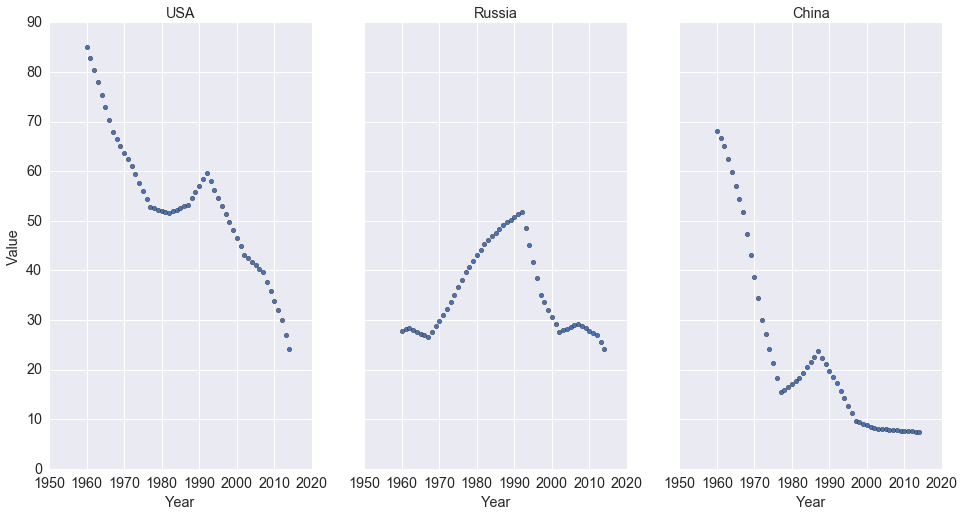

In [110]:
# This section of code builds upon Justin Markham and Brandon M Burrough's "Introduction to Linear Regression" notebook found here: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
# It creates three scatter plots that can easily compare between the three countries of interest. In many cases these scatter plots form a distinguishable line such that no regression line needs to be added.

print("Visualizing the Adolescent Birth Rate for the US, Russia, and China")
fig, ax = plt.subplots(1, 3, sharey=True)
df_us_abr.plot(kind='scatter', x='Year', y='Value', ax=ax[0], figsize=(16, 8), title='USA')
df_rus_abr.plot(kind='scatter', x='Year', y='Value', ax=ax[1], title='Russia')
df_chi_abr.plot(kind='scatter', x='Year', y='Value', ax=ax[2], title='China')


### Analysis of the Adolescent Birth Rate Visualization
As seen above, both the US and China seem to have similar trajectories, where their earliest recorded datapoint is their highest.  This means both started in 1960 with comparitively high adolescent birth rates, about 85 and 70 births per thousand population respectively.  Both countries see a sharp downward trend until about 1975, where they begin trending upwards until finally they both drop again either shortly before or shortly after 1990.  After that the only major difference observed is that China appears to have plateaued off at a low of around 8 births per thousand, while the US continues a sharp downard trend.  
Meanwhile, Russia is noticeably different from both the US and China.  Russia starts 1960 being much lower than the others, at only 30 births per thousand, then has a longer and more steady upward trend from 1968 to 1992, where it sharply drops back to the norm of 30 births per thousand and stays there.  
Based on this data it seems that in the early nineties there was some global event that caused a drop in adolescent births, though what exactly that event might be remains unclear.

### Gross Domestic Product (GDP) Visualization

Visualizing Gross Domestic Product (GDP) for the US, Russia, and China


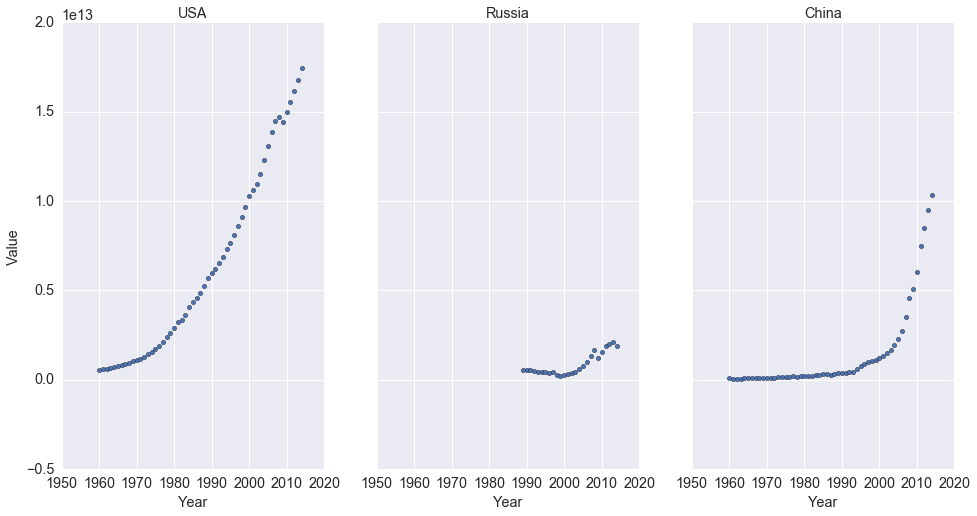

In [111]:
print("Visualizing Gross Domestic Product (GDP) for the US, Russia, and China")
fig, ax = plt.subplots(1, 3, sharey=True, sharex=True)
df_us_gdp.plot(kind='scatter', x='Year', y='Value', ax=ax[0], figsize=(16, 8), title='USA')
df_rus_gdp.plot(kind='scatter', x='Year', y='Value', ax=ax[1], title='Russia')
df_chi_gdp.plot(kind='scatter', x='Year', y='Value', ax=ax[2], title='China')

### Analysis of the Gross Domestic Product (GDP) Visualization  
The US is clearly different from both other countries, enjoying an upward trend that saw them grow from 543 Billion (0.0543e+13) Current US Dollars in 1960 to over 17.4 Trillion (1.74e+13) in 2014.  The growth was always upward, but hit an obvious inflection point around 1975 where the growth accelerated to a rapid rate that continued to climb aside from a slight blip near the onset of the 2008 housing crisis.  
While we do not have data for Russia prior to 1989, the data we do have tells a completely different story from the US.  Russia actually was in a slight downward trend until it shuffled into a slight upward trend around the turn of the millenium.  Even so, the upward movement stalled around 2007 and has yet to really recover, still hovering around 2 Trillion USD.  
China appears to be a combination of the other two countries, where it starts off with decades of little to no growth, begins expanding in the early nineties, then explodes into a growth rate as strong or stronger than the US in the mid-2000's.  In fact, China's GDP doubled from 5.06 Trillion USD in 2009 (0.506e+13) to 10.4 Trillion USD in 2014 (1.04e+13).


### GDP Per Capita Visualization

Visualizing Gross Domestic Product (GDP) Per Capita for the US, Russia, and China


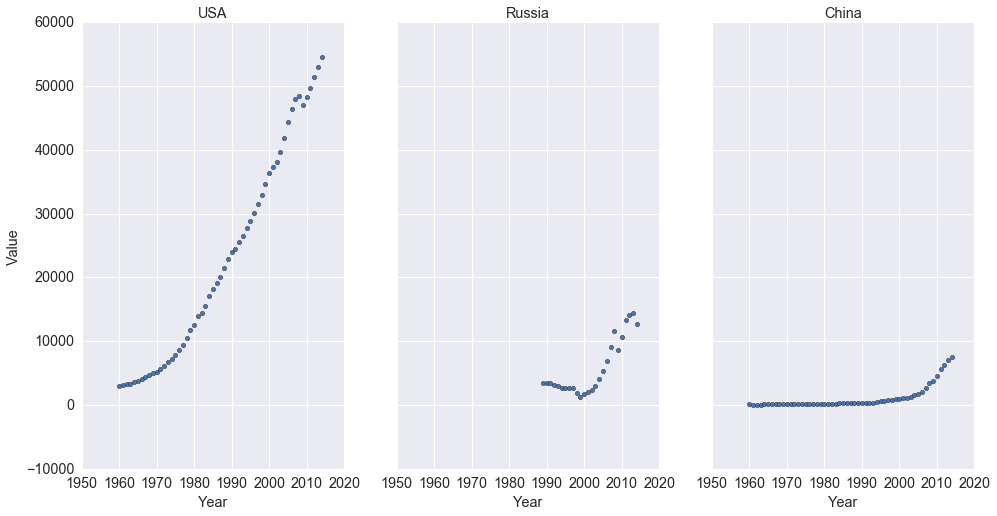

In [112]:
print("Visualizing Gross Domestic Product (GDP) Per Capita for the US, Russia, and China")
fig, ax = plt.subplots(1, 3, sharey=True, sharex=True)
df_us_gdpc.plot(kind='scatter', x='Year', y='Value', ax=ax[0], figsize=(16, 8), title='USA')
df_rus_gdpc.plot(kind='scatter', x='Year', y='Value', ax=ax[1], title='Russia')
df_chi_gdpc.plot(kind='scatter', x='Year', y='Value', ax=ax[2], title='China')

### Analysis of the GDP Per Capita Visualization  
For the US, the slope of the GDP Per Capita seems to match that of the total GDP, suggesting that all of the economic growth seen during that time kept pace with the country's population. The latest recorded GDP per captita in the US, $54,629 per person, is over four times the current value for Russia ($12,735 per person), and over seven times the current value for China ($7,590 per person).  
Russia's trend for GDP per capita also seems to match its trend for total GDP, and if anything the per capita has grown slightly more than the total.  China's GDP per capita, however, seems to be much flatter than the total GDP right up until the country enjoyed its second, more pronounced change in growth rate in the mid-2000's.  This could suggest that only very strong economic growth could measurably increase GDP per capita when your country has a very large population like China's.


### Percentage of Government Seats Held By Women Visualization

Visualizing The Percentage of Government Positions Held By Women for the US, Russia, and China


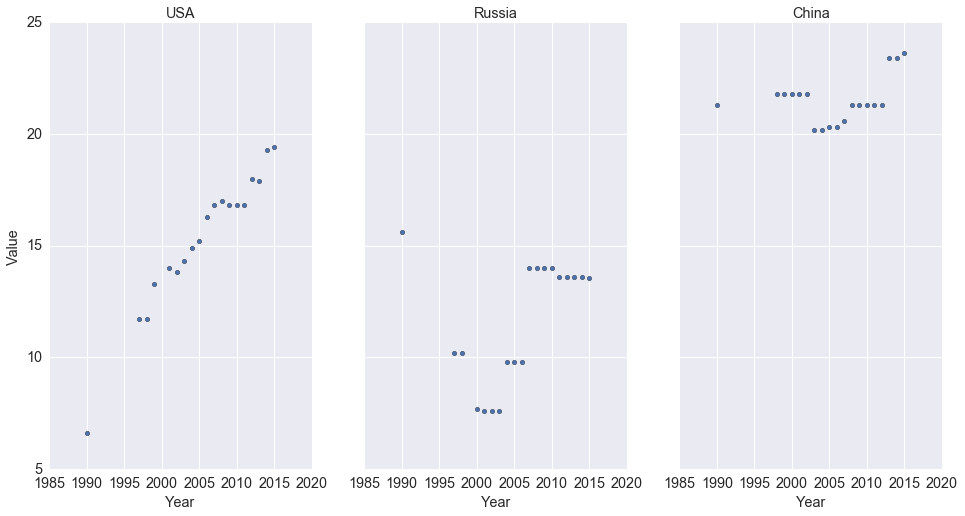

In [113]:
print("Visualizing The Percentage of Government Positions Held By Women for the US, Russia, and China")
fig, ax = plt.subplots(1, 3, sharey=True)
df_us_wip.plot(kind='scatter', x='Year', y='Value', ax=ax[0], figsize=(16, 8), title='USA')
df_rus_wip.plot(kind='scatter', x='Year', y='Value', ax=ax[1], title='Russia')
df_chi_wip.plot(kind='scatter', x='Year', y='Value', ax=ax[2], title='China')

### Analysis of the Percentage of Government Seats Held By Women Visualization  
None of these countries seem to have gathered data between 1990 and 1996, and the earliest datapoint is from 1990 so this attribute is relatively recent.  This causes the lone datapoint 1990 to appear to be an outlier.  This does not seem to pose much of an issue for China, where the value in 1990 matches the general 20-25% participation rate that it has always had.  It does not appear to be of much concern for the US either, as even though it is far lower than any other values it does stay along the linear trend of of the growth.  Russia, however, sees this outlier as being higher than any other point and not clearly part of a simple linear trend (more of a quadratic U-shaped trend).  
Keeping that in mind, the US has a steady upward trend of growth from around 7 percent participation in 1990 to nearly 20 percent participation in 2015.  This is higher than Russia, which aside from the lone 1990 datapoint has never risen higher than 14 percent participation and seems to be steady or dropping rather than rising based on the most recent trends.  China, however, has gone slightly up and down but has never dropped below 20 percent participation.

### Labor Force Participation Rate Visualization

Visualizing The Labor Force Participation Rate for the US, Russia, and China


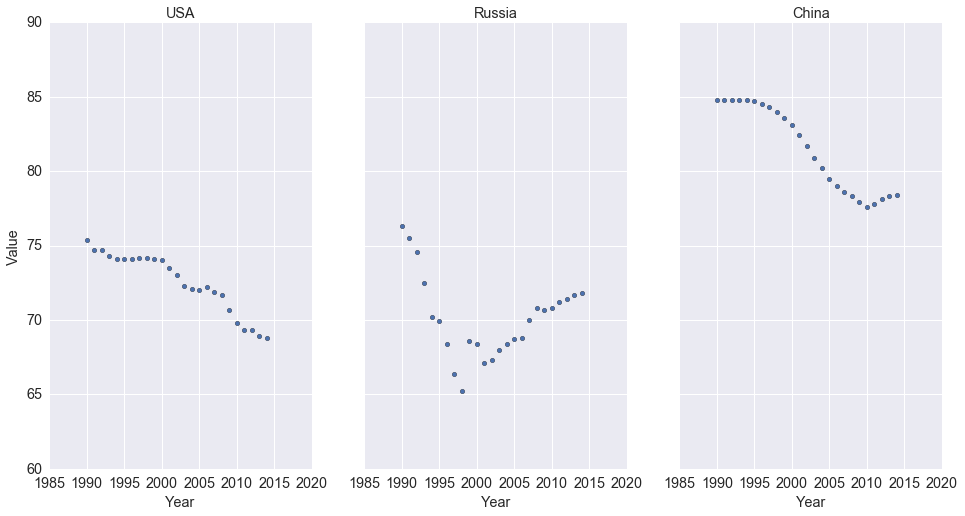

In [114]:
print("Visualizing The Labor Force Participation Rate for the US, Russia, and China")
fig, ax = plt.subplots(1, 3, sharey=True)
df_us_lfp.plot(kind='scatter', x='Year', y='Value', ax=ax[0], figsize=(16, 8), title='USA')
df_rus_lfp.plot(kind='scatter', x='Year', y='Value', ax=ax[1], title='Russia')
df_chi_lfp.plot(kind='scatter', x='Year', y='Value', ax=ax[2], title='China')

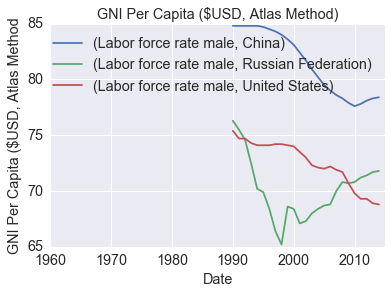

In [120]:
#TO DO WORK ON THIS!!!
# dataframe df is not set correctly!!
import wbdata
import wbdata as wb
import pandas
import matplotlib.pyplot as plt
 
#set up the countries I want
countries = ["USA","RUS","CHN"]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'SL.TLF.CACT.MA.ZS':'Labor force rate male'}
 
#grab indicators above for countries above and load into data frame
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)


#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

# a simple matplotlib plot with legend, labels and a title
dfu.plot(); 
plt.legend(loc='best'); 
plt.title("GNI Per Capita ($USD, Atlas Method)"); 
plt.xlabel('Date'); plt.ylabel('GNI Per Capita ($USD, Atlas Method');

### Analysis of the Labor Force Participation Rate Visualization  
The US shows a steady rate between 1990 and 2000, before dropping to a pleateau of 72.5% in 2003, and dropping a second time in 2009 to about 69% where it rests today.  
Russia shows the sharpest decline from 1990 to 1998, after which it rebounded and showed steady growth since then.  As a country it started at a high of about 76% participation, fell to a low of about 65%, and currently sits at about 72%.  
China shows far and away the highest labor force participation rate for all times observed.  It stayed stable at nearly 85% participation before beginning a slow decline in the late nineties that saw it drop to a low of 77.5%, which it has since slightly recovered from.  China's current labor force participation rate is close to 78%.


# TO DO  
# Analyze the relationship between the important attributes

### Ones that seem interesting might include the following:
1. Comparing GDP with GDP per Capita
2. Comparing Adolescent Birth Rate with Women holding seats in government
3. Comparing labor force participation rate with GDP
4. Comparing labor force participation rate with GDP Per Capita
5. Comparing Adolescent Birth Rate with GDP

# TO DO

# Identify and Deal with Missing Values  

### One Idea: We had some missing values between 1990 and 1996 for the percentage of women in government data.  I spoke a bit about it in the visualization but it could certainly be expanded upon.

# TO DO

# Use Imputation to Deal with Missing Values 

# Why Imputation 

We are working on large data set where the data are expensive and we have many attributes/features. We can not afford to throw data out.  This could have many side effects and may cause our final analysis to be biased and incorrect. 

As a consensus, our team decided to use the normalized imputation method to determine how to fill in the missing data.  The easiset way to impute the missing data is to fill in the missing entries using the method taught in class.

* df_normalized = (df_sub-df_sub.min())/(df_sub.max()-df_sub.min())
* handle missing Categorical and Continuous feature variables.

# TO DO 
At a high level, we need to determine what is our hypothesis or what are we trying to test at HIGH LEVEL.

If this is not decided early on, we will be all over the place. This will make us look like we are confused by not taking a stand once our EDA analysis is completed. This will make it easier to complete the project 1 assignment.

Our report has to be on target, where we can explain in layman's terms the problem to upper management of our findings.  Upper management will not be impressed by what we have done, but have we identified and provided a solution to the problem in simple terminology.  